
# Pre-Bayesian Comparison of Classifiers :)

## Null-Hypothesis Significance Tests

  
### A quick reintroduction

In [1]:
import numpy as np

scores_a = np.array([ 95.95,  71.4 ,  83.34,  49.99,  76.17,  86.22,  84.45,  81.87, 52.81,  75.04,  71.94,  50.12,  72.03,  60.  ,  83.69])
scores_b = np.array([ 97.88,  71.66,  82.87,  50.71,  74.17,  86.68,  85.46,  82.02, 60.08,  75.83,  74.53,  45.76,  72.65,  60.  ,  84.31])

In [2]:
sum(scores_a > scores_b), sum(scores_a == scores_b), sum(scores_b > scores_a)

(3, 1, 11)

In [3]:
# Disclaimer: This is not an exemplary use of Python.
# The code is optimized for those who are not used to it.

from random import random

results = []
for match in range(1000):
    wins = 0
    for dataset in range(15):
        if random() < 0.5:
            wins += 1
    results.append(wins)

In [4]:
wins = np.bincount(results, minlength=15)
print(wins)

[  1   1   3  17  47 108 138 190 194 161  90  34  14   2   0]


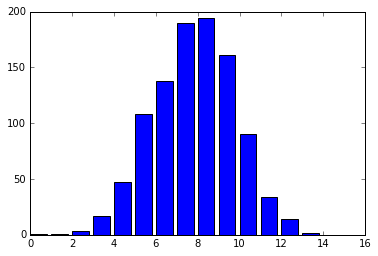

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

_ = plt.bar(range(15), wins)

In [6]:
sum(wins[11:])

50

## The logic of the test

There is around 6 % chance (60 out of 1000) that B will win 11 or more matches if the algorithms were actually same.

Since such a result is so unlikely, we reject the idea that A and B perform the same.

## Testing without sweating

Compute distributions analytically.

In this case: binomial distribution.

The whole exercise above is called the sign test.

# Tests that you can actually use

## (but perhaps shouldn't)

## A Pair of Classifiers

### Wilcoxon signed-ranks test

In [7]:
import scipy.stats
scipy.stats.wilcoxon(scores_a, scores_b)

WilcoxonResult(statistic=28.0, pvalue=0.12395016441234137)

## Multiple classifiers

### Friedman test

In [8]:
scores = np.array(
      [[  95.94595,   97.88477,   98.19664,   98.64226,   98.65337],
       [  71.39521,   71.6561 ,   73.14819,   77.2214 ,   77.26883],
       [  83.3377 ,   82.87099,   81.95057,   77.1957 ,   77.22797],
       [  49.98591,   50.70515,   51.71036,   49.49834,   49.53232],
       [  76.16673,   74.16672,   61.00001,   83.50006,   83.50006],
       [  86.21744,   86.68119,   84.88411,   86.28991,   86.40586],
       [  84.44935,   85.46383,   84.30431,   85.05801,   85.14497],
       [  81.87252,   82.02315,   80.12298,   80.21214,   80.41979],
       [  52.8114 ,   60.08016,   63.39823,   64.20668,   64.19279],
       [  75.04   ,   75.83   ,   75.65   ,   72.17   ,   72.17   ],
       [  71.93504,   74.5346 ,   73.77053,   72.31167,   72.31384],
       [  50.12499,   45.7625 ,   38.66669,   39.66248,   40.04585],
       [  72.03123,   72.64526,   72.31939,   71.50976,   71.57642],
       [  60.     ,   60.     ,   56.9375 ,   60.     ,   60.     ],
       [  83.6875 ,   84.3125 ,   85.54998,   78.57087,   79.08754],
       [  84.36091,   84.42988,   84.80345,   80.51726,   80.58623],
       [  98.31118,   98.52327,   99.05625,   99.18611,   99.17557],
       [  89.40237,   91.0858 ,   91.48102,   90.11586,   90.14524],
       [  93.33322,   93.06656,   92.06654,   93.59991,   93.59991],
       [  87.79086,   91.03252,   92.34689,   99.43702,   99.39943],
       [  87.59993,   88.43326,   91.59994,   85.79996,   85.39996],
       [  56.84723,   56.84723,   56.61866,   56.84723,   56.84723],
       [  85.09998,   86.86189,   85.57139,   76.37137,   77.24757],
       [  62.66532,   64.52785,   66.24374,   64.09357,   64.07691],
       [  74.63639,   84.63801,  100.     ,   97.80228,   97.80228],
       [  96.38929,   96.73215,   97.99556,   98.91727,   98.91727],
       [  95.76072,   99.9508 ,   99.9631 ,  100.     ,  100.     ],
       [  90.29939,   92.73304,   94.24765,   97.18137,   97.18986],
       [  92.16903,   96.91635,   96.21347,   78.59252,   80.38254],
       [  93.37478,   96.92301,   96.67273,   96.60513,   96.54662],
       [  80.41671,   79.83337,   83.16672,   73.16674,   73.66674],
       [  87.72004,   97.76273,   97.66812,   88.61625,   89.56246],
       [  75.26002,   75.70347,   74.56967,   74.32345,   74.31062],
       [  68.11142,   66.77809,   65.1114 ,   69.77806,   69.77806],
       [  47.19786,   47.87167,   47.8458 ,   41.00794,   40.94911],
       [  91.14715,   95.06921,   96.47191,   94.14284,   94.09091],
       [  85.59372,   88.36932,   88.61455,   88.9546 ,   88.9546 ],
       [  86.62217,   87.31057,   87.46307,   89.9792 ,   90.01045],
       [  93.81435,   97.81069,   97.31636,   97.841  ,   97.841  ],
       [  76.71185,   77.04996,   76.12854,   74.67613,   74.86423],
       [  92.19582,   93.30815,   94.6709 ,   92.63445,   93.03048],
       [  89.82622,   93.11031,   92.27349,   92.85163,   93.22753],
       [  79.21932,   80.90305,   81.80477,   81.05974,   81.51275],
       [  95.41686,   96.11599,   96.13167,   94.16605,   94.15662],
       [  59.03334,   59.4    ,   57.46667,   63.5    ,   63.5    ],
       [  62.06667,   67.66667,   71.79999,   77.66667,   77.5    ],
       [  46.32085,   46.72085,   43.93333,   46.78335,   46.78335],
       [  58.78783,   75.69693,   84.60603,   76.53533,   76.68688],
       [  79.968  ,   85.008  ,   84.874  ,   74.872  ,   75.522  ],
       [  64.92861,   66.7381 ,   77.90477,   60.95248,   60.95248],
       [  98.70582,   98.2058 ,   97.58814,   90.72864,   90.94432],
       [  97.19638,   97.05376,   96.36779,   95.03683,   95.28029],
       [  57.61428,   57.81658,   57.73517,   57.0753 ,   57.08878],
       [  93.98181,   94.66363,   99.6    ,   92.60908,   92.60908]])

In [9]:
scipy.stats.friedmanchisquare(scores[:, 0], scores[:, 1], scores[:, 2], scores[:, 3], scores[:, 4])

FriedmanchisquareResult(statistic=20.840496657115558, pvalue=0.00034058004490788676)

In [10]:
scipy.stats.friedmanchisquare(*scores.T)

FriedmanchisquareResult(statistic=20.840496657115558, pvalue=0.00034058004490788676)

## Summary

Null-hypothesis significance tests are magic bullet.

1. Formulate hypothesis.
2. Get the data.
3. Put it through the appropriate test.

Null-hypothesis significance tests automatize science.

# Arguments against NHST

### The flawed logic of NHST

- If the null-hypothesis was true, algorithm A should have won 7 matches out of 14.

- Algorithm A did not win 7 matches.

=> The hypothesis is false.

All trees are green; I am not green; hence, I'm not a tree.

Null-hypothesis is probabilistic:

- If the null hypothesis is true, the number of wins is *unlikely* to be 11.

- But the number of wins *is* 11.

=>  So the null-hypothesis is *unlikely* to be true.

We reject the null-hypothesis (as unlikely).

- If somebody is a US citizen, he is unlikely to be the US president.

- But Barack Obama *is* the US president.

=> Barack Obama is not a US citizen.

We reject the claim that president Obama is a US citizen (as unlikely).

Birthers are right!

(Scientifically proven; p < 0.05.)

### What is the p-value?

We

1. **know** that the p-value is the probability of getting such data if the null hypothesis was true,
2. **pretend** and act as if the p-value was the probability of the null-hypothesis.

We reject the null-hypothesis (for being too improbable, as in 2)
if the observed data was improbable (as in 1).

We all know our Bayes.

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

and

$$P(H|D) \ne P(D|H)$$

$P(H|D)$ depends on the prior $P(H)$.

We all 

1. **know** that the p-value is the probability of getting such data if the null hypothesis was true,

*i.e.* we know that p-value is something we don't care about.

... except that it has to be < 0.05 so we can publish.

**p-values are meaningless since they represent the probability that nobody cares about**.

### NHST is asking for wrong interpretations

"* (...) p <0.05, therefore the null-hypothesis is unlikely*".

Wrong. It's not the hypothesis that's unlikely. Just the data.

"* (...) p > 0.05, therefore our superfast method is no worse than the existing slow algorithm.*"

Wrong. You cannot prove the null. You can only reject it.

*NHST is a tool and it's not the tool's fault that it's misused.*

Objection. NHST is presented as a tool for researchers interested in whether their hypotheses are true or not.

If you bought a hammer because it was advertised as a tool for cutting meat, you'd send it back to Amazon.

... and write a nasty review.

### Send the NHST back to ... whom?

**Fisher**: p-value as the evidence against the null-hypothesis.

*Something weird is going on here...*

**Neyman & Pearson**: making optimal decisions with respect to probabilities of mutually exclusive hypotheses.

Both approaches are correct.   

P-values are not unlike likelihoods, which are related to probabilities.

Deciding between two hypothesis is totally not unlike decision making.

Their combination is unfortunately not.

### What brought as here?

Combining the two conflicting approaches

to satisfy the wish(ful thinking) for a magic bullet for proving hypotheses.



### Back to p < 0.05: Why 0.05?

0.05 is the magic $p$-value. Anything below that is success, anything above that is failure.

Nothing magic about 0.05.

No reason to print numbers related to $p < 0.05$ in **bold print**.

Not only is there no sacred critical value.

There is no way to reason about critical values.

**P-values are meaningless.**

How do you set a reasonable threshold for a meaningless value?

No, p = 0.05 doesn't mean we accept 5 % of false alternative hypotheses.

P-values are not related to probabilities of hypotheses.

NHST is revolves around the meaningless threshold (0.05) for automatizing decisions about which findings are true and which are random.

### The null-hypotheses is always false

No two classifiers are exactly same (unless they are *the* same classifier).

Hence, we should always reject the null-hypothesis. We just need to collect enough data.

Why go through collecting all the data then, if we already know the end result?

Sorry for the spoiler, guys:

**The null-hypotheses dies in Section 4.**

### The p-value does not distinguish between the *effect size* and the *sample size*

Arbitrarily small difference between a pair of classifiers (*effect size*) is statistically significant with enough data.

The p-value is the function of the effect and the sample size.

The sample size is manipulated by the researcher. Now do the math.

The p-value is intuitively understood as the indicator of the effect size.

Wrong. It is the function of effect size and sample size: same p-values do not imply same effect sizes.

Non-parametric tests make this even worse by ignoring the differences.

If one classifier consistently beats another, the difference does not matter. 

### Other problems

The list goes on and on.

- NHST has problems with testing multiple hypotheses.
- ... especially with multiple researchers performing similar experiments.
- NHST relies on assumptions about distributions.
- Sampling intention
- Ignoring the data uncertainty
- Not saying anything about the alternative hypotheses
- ...

## Abandon null-hypotheses significance tests?

Good luck with that.

Next year it will be 50 years since Meehl wrote:

Significance testing is *a potent but sterile intellectual rake who leaves in his merry path a long train of ravished maidens but no viable scientific offspring*.

The American Statistical Association issued a statement (quote) *to steer research into a ‘post p<0.05 era.’*

1. *P-values can indicate how incompatible the data are with a specified statistical model.*
2. *P-values do not measure the probability that the studied hypothesis is true, or the
probability that the data were produced by random chance alone.*
3. *Scientific conclusions and business or policy decisions should not be based only on
whether a p-value passes a specific threshold.*
4. *Proper inference requires full reporting and transparency.*
5. *A p-value, or statistical significance, does not measure the size of an effect or the
importance of a result.*
6. *By itself, a p-value does not provide a good measure of evidence regarding a model or
hypothesis.*

The journal of Basic and Applied Social Psychology prohibited the use the p-word in their journal.

(I believe that) NHST was useful

- Its logic was wrong.
- Its computation was wrong.
- But it forced us to collect more data.
- It forced us to sometimes concede the defeat.

- It may have been better than nothing.
- We didn't have the necessary computational power for the alternative, better approach.

But now we do.